<a href="https://colab.research.google.com/github/SiriBatchu/Data-preparation_EDA_Visualization/blob/main/TimeSeries(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and Import Necessary Libraries

In [ ]:
!pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

In [ ]:
# Load the dataset
data = pd.read_csv('/content/AirQuality.csv', delimiter=';', decimal=',', parse_dates=True, na_values=['-200'])
print(data.head())


         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0

In [ ]:
data = data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

# Initial EDA

In [ ]:
# Check basic information and missing values
print(data.info())
print(data.isnull().sum())

# Summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB
None
Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480

# Handling Missing Values

Date             114
Time             114
CO(GT)             0
PT08.S1(CO)        0
NMHC(GT)           0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)            0
PT08.S3(NOx)       0
NO2(GT)            0
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
dtype: int64


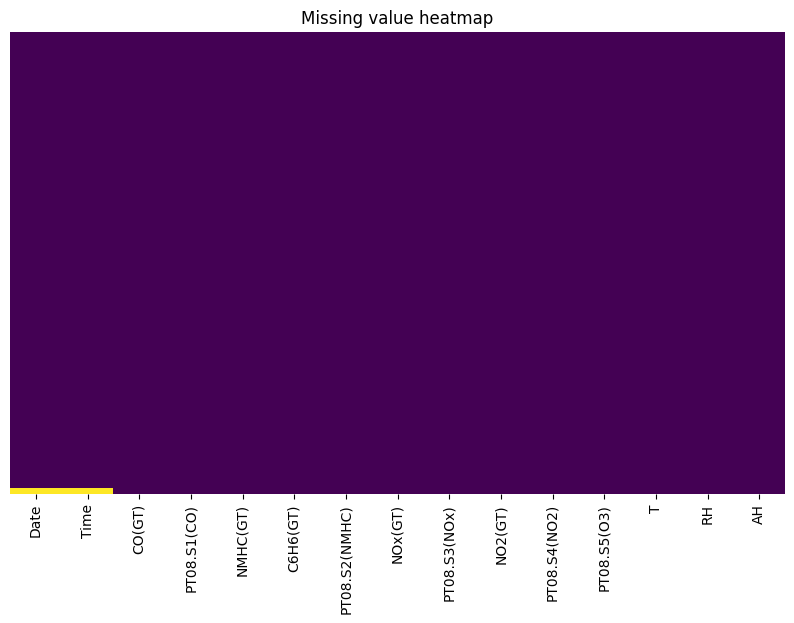

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Visualize missing values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing value heatmap')
plt.show()

In [ ]:
# Replace missing values, for example, with the median or mean
for column in data.columns:
    if data[column].dtype != 'object':
        data[column].fillna(data[column].median(), inplace=True)

<ipython-input-20-8a8d1b0d2399>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)


In [ ]:
# For numeric columns, fill missing values with the mean or median
for col in data.select_dtypes(include=np.number).columns:
    data[col].fillna(data[col].mean(), inplace=True)

<ipython-input-21-c3bfa37e8982>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


# Data Transformation

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


# Handling Outliers

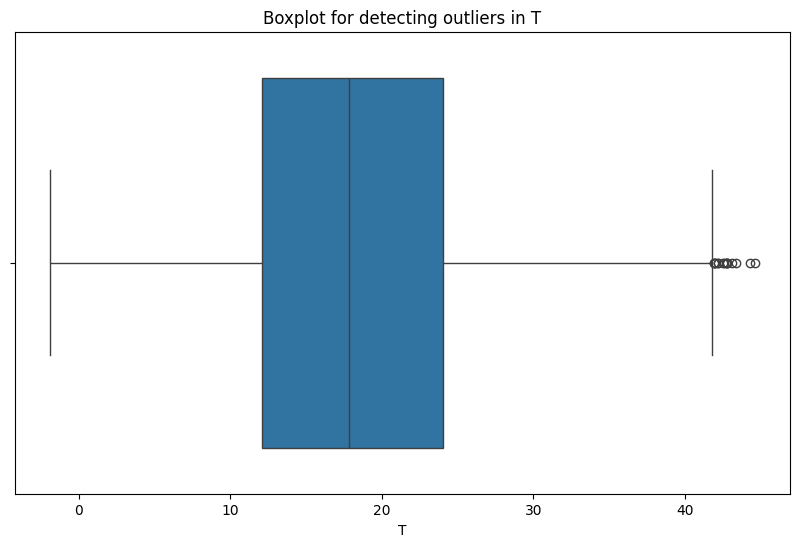

In [ ]:
# Simple boxplot to visualize outliers in the 'T' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['T'])
plt.title('Boxplot for detecting outliers in T')
plt.show()

# Assuming 'T' is normally distributed, remove outliers using z-score
from scipy import stats
data = data[(np.abs(stats.zscore(data['T'])) < 3)]

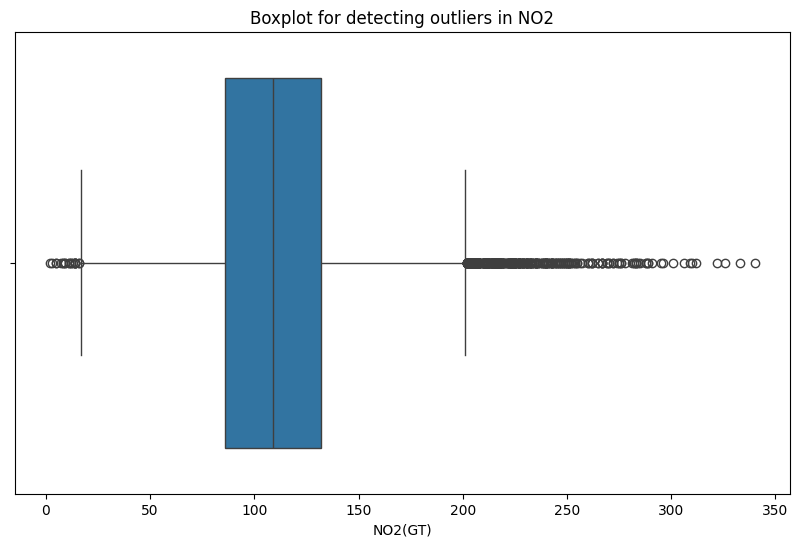

In [ ]:
# Simple boxplot to visualize outliers in the 'NO2' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['NO2(GT)'])
plt.title('Boxplot for detecting outliers in NO2')
plt.show()

# Assuming 'NO2' is normally distributed, remove outliers using z-score
from scipy import stats
data = data[(np.abs(stats.zscore(data['NO2(GT)'])) < 3)]

# Feature Engineering

In [ ]:
# Check if relevant pollutant columns are present
if all(col in data.columns for col in ['NO2(GT)', 'CO(GT)', 'NMHC(GT)']):
    data['Pollution_Score'] = data[['NO2(GT)', 'CO(GT)', 'NMHC(GT)']].mean(axis=1)
else:
    print("Relevant pollution columns not found.")

In [ ]:
# Print Pollution Score
print(data['Pollution_Score'])


0       88.533333
1       68.666667
2       68.066667
3       68.066667
4       56.200000
          ...    
9466    86.933333
9467    86.933333
9468    86.933333
9469    86.933333
9470    86.933333
Name: Pollution_Score, Length: 9385, dtype: float64


In [ ]:
# create interaction terms
if 'T' in data.columns and 'NO2(GT)' in data.columns:
    data['Temp_NO2'] = data['T'] * data['NO2(GT)']
    print(data[['T', 'NO2(GT)', 'Temp_NO2']].head())
else:
    print("One or more required columns for interaction terms are missing.")

      T  NO2(GT)  Temp_NO2
0  13.6    113.0    1536.8
1  13.3     92.0    1223.6
2  11.9    114.0    1356.6
3  11.0    122.0    1342.0
4  11.2    116.0    1299.2


# Visualizing Data

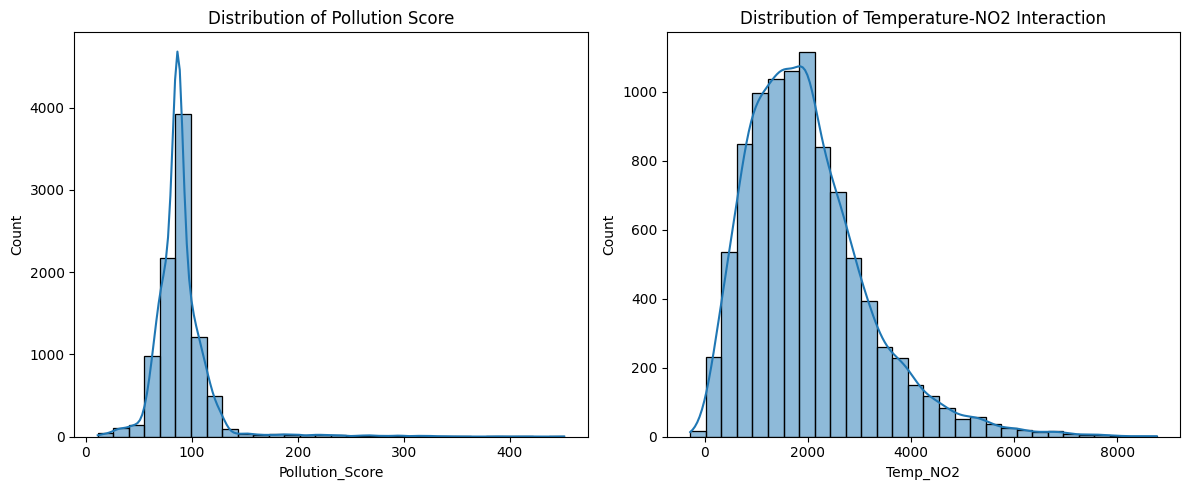

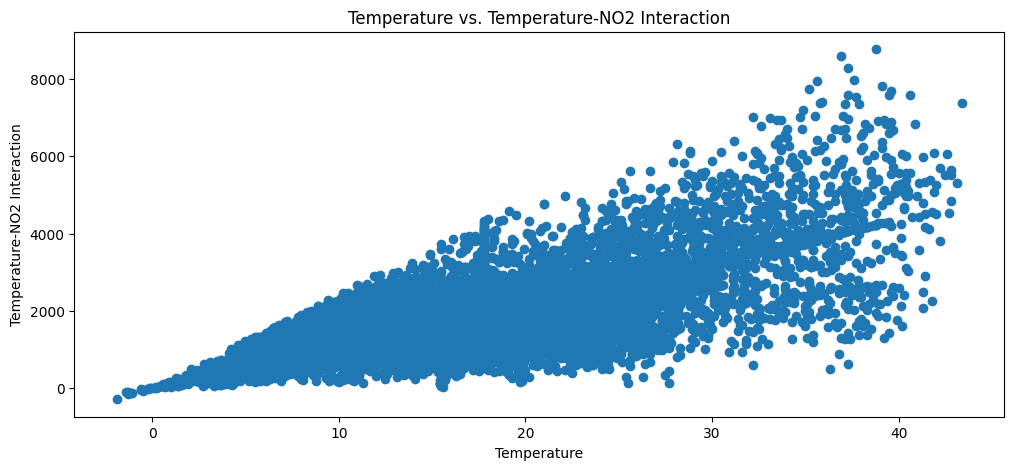

In [ ]:
# Visualize new features with histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Pollution_Score'], bins=30, kde=True)
plt.title('Distribution of Pollution Score')

plt.subplot(1, 2, 2)
sns.histplot(data['Temp_NO2'], bins=30, kde=True)
plt.title('Distribution of Temperature-NO2 Interaction')

plt.tight_layout()
plt.show()

# Use scatter plots to see the relationship between new and existing features
plt.figure(figsize=(12, 5))
plt.scatter(data['T'], data['Temp_NO2'])
plt.xlabel('Temperature')
plt.ylabel('Temperature-NO2 Interaction')
plt.title('Temperature vs. Temperature-NO2 Interaction')
plt.show()

In [ ]:
import pandas as pd
# Reload the dataset with the correct delimiter
data = pd.read_csv('/content/AirQuality.csv', delimiter=';')

# Drop unnecessary columns if they are empty
data = data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

# Get basic info on the dataset
data.info()

# Display summary statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


In [ ]:
# Impute missing values using forward fill
data.fillna(method='ffill', inplace=True)

# Verify that there are no missing values left
data.isnull().sum()

<ipython-input-48-fde588ff9eaf>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


# EDA

In [ ]:
# Attempt to parse Date and Time with specified format and identify rows that failed
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')

# Check for rows with NaT in Datetime
missing_dates = data[data['Datetime'].isna()]

# Display rows with NaT in Datetime to understand the format issue
missing_dates[['Date', 'Time']].head()

# Parse Date and Time columns separately, and then combine them
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H.%M.%S', errors='coerce').dt.time

# Combine Date and Time into a single Datetime column
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str), errors='coerce')

# Drop rows with NaT in the Datetime column
data = data.dropna(subset=['Datetime'])

# Set the Datetime column as the index
data = data.set_index('Datetime')

# Confirm the first few rows to ensure the index is set correctly
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2004-03-10,18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
2004-03-10 19:00:00,2004-03-10,19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2004-03-10 20:00:00,2004-03-10,20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
2004-03-10 21:00:00,2004-03-10,21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
2004-03-10 22:00:00,2004-03-10,22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [ ]:
# Replace comma with period in all string columns and convert them to numeric
for column in data.columns:
    data[column] = data[column].astype(str).str.replace(',', '.')
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Display the first few rows to confirm changes
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,NaN,NaN,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,NaN,NaN,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,NaN,NaN,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,NaN,NaN,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,NaN,NaN,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


# Visualizing the Data

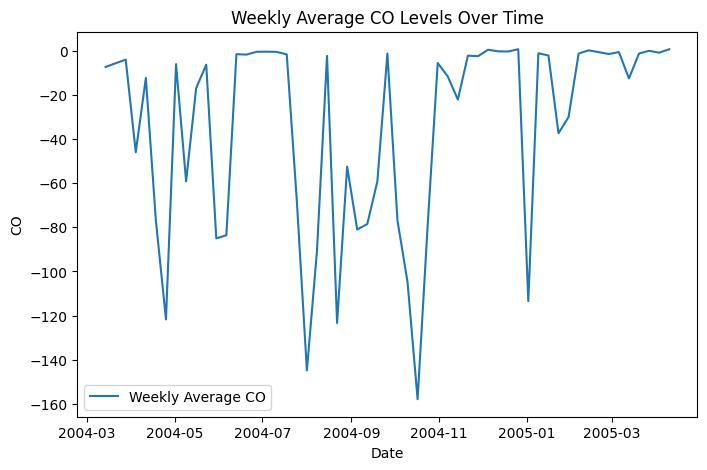

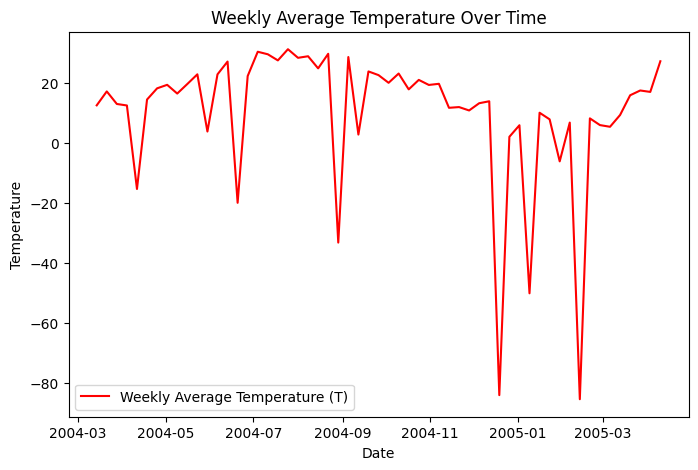

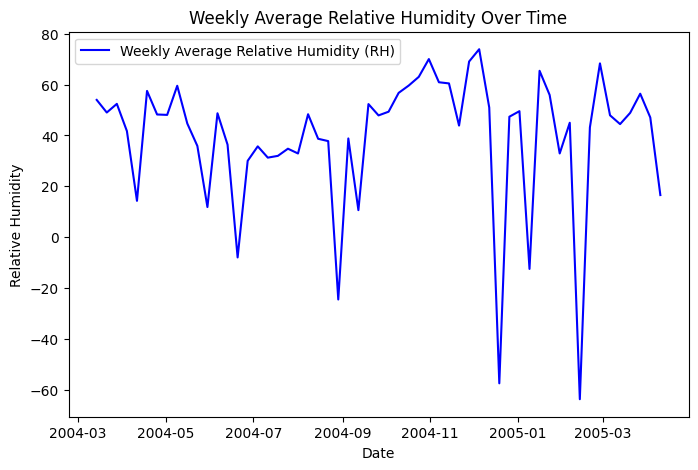

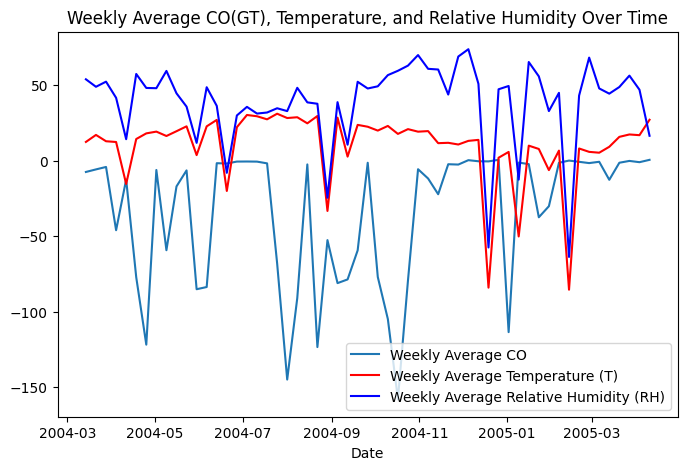

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Resample the CO column to weekly averages
weekly_data = data['CO(GT)'].resample('W').mean()

# Plot the resampled data
plt.figure(figsize=(8, 5))
plt.plot(weekly_data, label='Weekly Average CO')
plt.title('Weekly Average CO Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO')
plt.legend()
plt.show()

# Resample Temperature (T) to weekly averages and plot
weekly_temp = data['T'].resample('W').mean()

plt.figure(figsize=(8, 5))
plt.plot(weekly_temp, color='red', label='Weekly Average Temperature (T)')
plt.title('Weekly Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Resample Relative Humidity (RH) to weekly averages and plot
weekly_humidity = data['RH'].resample('W').mean()

plt.figure(figsize=(8, 5))
plt.plot(weekly_humidity, color='blue', label='Weekly Average Relative Humidity (RH)')
plt.title('Weekly Average Relative Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Relative Humidity')
plt.legend()
plt.show()

# Weekly Average CO(GT), Temperature, and Relative Humidity Over Time
plt.figure(figsize=(8, 5))
plt.plot(weekly_data, label='Weekly Average CO')
plt.plot(weekly_temp, label='Weekly Average Temperature (T)', color='red')
plt.plot(weekly_humidity, label='Weekly Average Relative Humidity (RH)', color='blue')
plt.title('Weekly Average CO(GT), Temperature, and Relative Humidity Over Time')
plt.xlabel('Date')
plt.legend()
plt.show()

# Correlation Matrix

In [ ]:
# Calculate correlation matrix
correlation_matrix = data[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
                           'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']].corr()

# correlation matrix
correlation_matrix

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041732,0.126467,-0.029960,0.032357,0.527421,-0.092224,0.672096,-0.076648,0.078184,-0.066331,-0.050986,-0.044761
PT08.S1(CO),0.041732,1.000000,0.169680,0.852558,0.932323,0.278051,0.086566,0.154028,0.843075,0.891481,0.754320,0.743754,0.764870
NMHC(GT),0.126467,0.169680,1.000000,0.036437,0.108350,-0.005738,0.050280,0.099758,0.164263,0.102284,-0.001533,0.010078,0.011828
C6H6(GT),-0.029960,0.852558,0.036437,1.000000,0.767546,-0.000081,0.510145,-0.008425,0.771296,0.639625,0.971199,0.921760,0.984546
PT08.S2(NMHC),0.032357,0.932323,0.108350,0.767546,1.000000,0.332601,-0.075836,0.180100,0.869083,0.906297,0.669792,0.581419,0.646673
NOx(GT),0.527421,0.278051,-0.005738,-0.000081,0.332601,1.000000,-0.437184,0.816675,0.032924,0.459597,-0.136230,-0.055196,-0.094898
PT08.S3(NOx),-0.092224,0.086566,0.050280,0.510145,-0.075836,-0.437184,1.000000,-0.259327,0.125313,-0.206641,0.584491,0.574683,0.619778
NO2(GT),0.672096,0.154028,0.099758,-0.008425,0.180100,0.816675,-0.259327,1.000000,-0.027848,0.248513,-0.079144,-0.086146,-0.058203
PT08.S4(NO2),-0.076648,0.843075,0.164263,0.771296,0.869083,0.032924,0.125313,-0.027848,1.000000,0.724141,0.749857,0.641946,0.689184
PT08.S5(O3),0.078184,0.891481,0.102284,0.639625,0.906297,0.459597,-0.206641,0.248513,0.724141,1.000000,0.500953,0.525891,0.518190


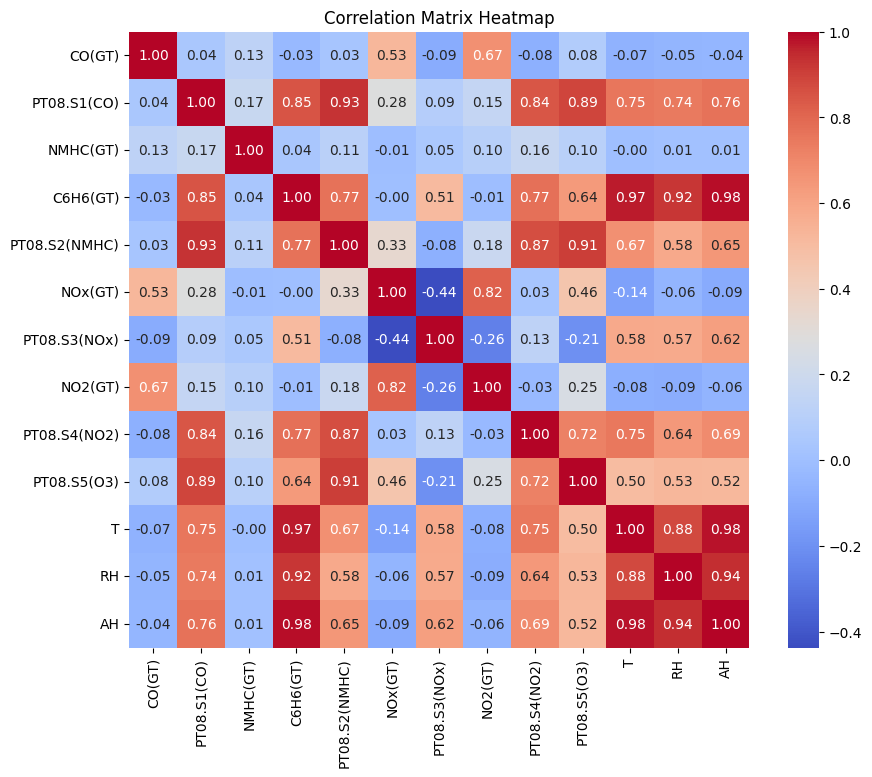

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Anomaly Detection

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values with the median of each column
imputer = SimpleImputer(strategy='median')
scaled_data = imputer.fit_transform(data.select_dtypes(include=[np.number]))

# Alternatively, check and remove any remaining NaN values explicitly
if np.isnan(scaled_data).any():
    scaled_data = scaled_data[~np.isnan(scaled_data).any(axis=1)]

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Date' 'Time']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)

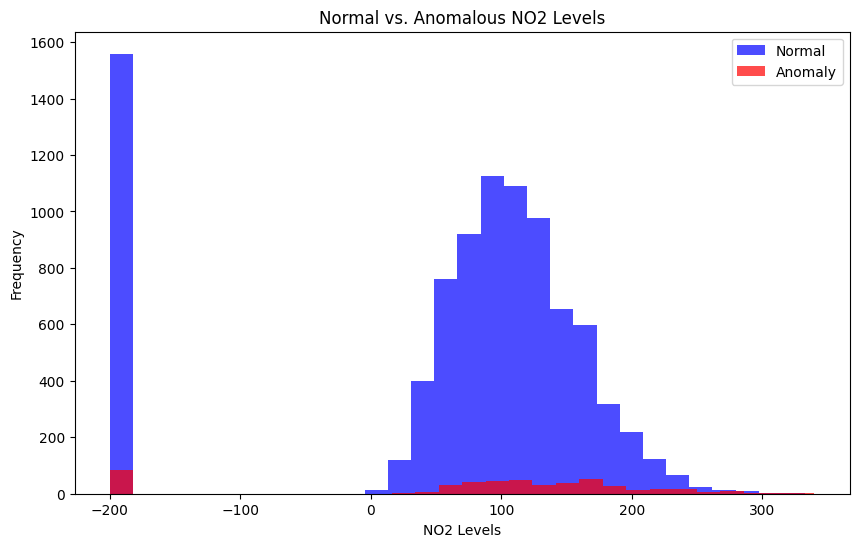

In [ ]:
iso = IsolationForest(contamination=0.05, random_state=42)
preds = iso.fit_predict(scaled_data)
data['anomaly'] = preds
anomalies = data[data['anomaly'] == -1]

# Plotting some results
plt.figure(figsize=(10, 6))
plt.hist(data.loc[data['anomaly'] == 1, 'NO2(GT)'], bins=30, alpha=0.7, color="blue")
plt.hist(data.loc[data['anomaly'] == -1, 'NO2(GT)'], bins=30, alpha=0.7, color="red")
plt.title('Normal vs. Anomalous NO2 Levels')
plt.xlabel('NO2 Levels')
plt.ylabel('Frequency')
plt.legend(['Normal', 'Anomaly'])
plt.show()

# Clustering Analysis

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in the dataset
imputer = SimpleImputer(strategy='median')
normal_data_imputed = imputer.fit_transform(data.select_dtypes(include=[np.number]))


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Date' 'Time']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data first since PCA is affected by scale
scaler = StandardScaler()
normal_data_scaled = scaler.fit_transform(normal_data_imputed)

# Applying PCA to reduce dimensions for better visualization and possibly enhanced clustering
pca = PCA(n_components=2)
projected = pca.fit_transform(normal_data_scaled)

# Check if the PCA was applied successfully
print("PCA projection shape:", projected.shape)

PCA projection shape: (9471, 2)


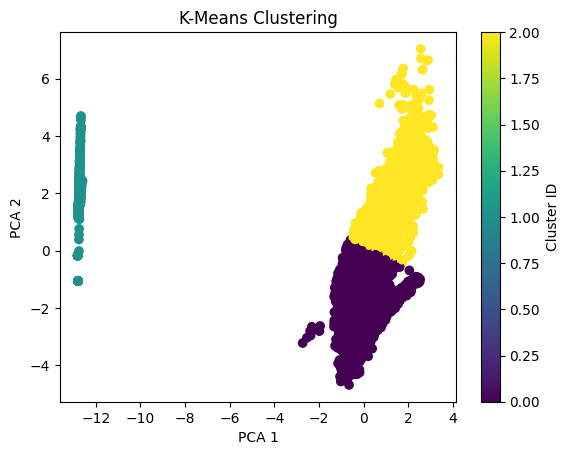

In [ ]:
from sklearn.cluster import KMeans

# Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(projected)
data['cluster'] = clusters

# Visualizing the clusters
plt.scatter(projected[:, 0], projected[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster ID')
plt.show()

In [ ]:
# Adding cluster information back to DataFrame for further analysis
data['cluster'] = clusters

# Analyze cluster characteristics
cluster_analysis = data.groupby('cluster').mean()
print(cluster_analysis)

         Date  Time     CO(GT)  PT08.S1(CO)    NMHC(GT)    C6H6(GT)  \
cluster                                                               
0         NaN   NaN -64.380859   964.131099 -178.196649    5.784126   
1         NaN   NaN -17.268852  -200.000000 -168.609290 -200.000000   
2         NaN   NaN  -1.406467  1248.722402 -138.292379   14.871732   

         PT08.S2(NMHC)     NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  \
cluster                                                                      
0           773.719372    5.389529    984.986597  -12.805654   1326.294869   
1          -200.000000  288.297814   -200.000000   94.562842   -200.000000   
2          1124.428637  341.040878    665.858661  136.209700   1590.975289   

         PT08.S5(O3)           T          RH          AH   anomaly  
cluster                                                             
0         766.067225   18.318010   49.153864    1.033584  0.995393  
1        -200.000000 -200.000000 -200.000000 -

# Modeling with AutoViML

In [ ]:
!pip install autoviml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-ensemble to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/

In [ ]:
!pip install scipy==1.7.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.7.3 which is incompatible.
arviz 0.20.0 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
a

In [ ]:
import pandas as pd
from autoviml.Auto_ViML import Auto_ViML
from sklearn.model_selection import train_test_split

# Reload the dataset
data = pd.read_csv('/content/AirQuality.csv', delimiter=';')
data = data.drop(columns=['Unnamed: 15', 'Unnamed: 16'], errors='ignore')

# Convert Date and Time columns to strings
data['Date'] = data['Date'].astype(str)
data['Time'] = data['Time'].astype(str)

# Specify the format explicitly for date-time conversion
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')

# Drop rows with NaT in Datetime and set as index
data = data.dropna(subset=['Datetime'])
data = data.set_index('Datetime')

# Verify the shape after date-time conversion
print("After Date-Time Conversion, Shape:", data.shape)
data.head()

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

Imported Auto_ViML version: 0.1.800. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            GPU_flag=False, verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)
After Date-Time Conversion, Shape: (9357, 15)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18.00.00,"2,6","1,360.00",150.00,"11,9","1,046.00",166.00,"1,056.00",113.00,"1,692.00","1,268.00","13,6","48,9","0,7578"
2004-03-10 19:00:00,10/03/2004,19.00.00,2,"1,292.00",112.00,"9,4",955.00,103.00,"1,174.00",92.00,"1,559.00",972.00,"13,3","47,7","0,7255"
2004-03-10 20:00:00,10/03/2004,20.00.00,"2,2","1,402.00",88.00,"9,0",939.00,131.00,"1,140.00",114.00,"1,555.00","1,074.00","11,9","54,0","0,7502"
2004-03-10 21:00:00,10/03/2004,21.00.00,"2,2","1,376.00",80.00,"9,2",948.00,172.00,"1,092.00",122.00,"1,584.00","1,203.00","11,0","60,0","0,7867"
2004-03-10 22:00:00,10/03/2004,22.00.00,"1,6","1,272.00",51.00,"6,5",836.00,131.00,"1,205.00",116.00,"1,490.00","1,110.00","11,2","59,6","0,7888"


In [ ]:
# Convert comma decimal separators to periods, then cast columns to numeric
for column in data.columns:
    data[column] = data[column].astype(str).str.replace(',', '.')
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Filter out rows with negative CO(GT) values
data = data[data['CO(GT)'] >= 0]

# Verify the data after filtering
print("After Filtering Negative CO(GT), Shape:", data.shape)
data.head()

After Filtering Negative CO(GT), Shape: (7674, 15)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,NaN,NaN,2.60,"1,360.00",150.00,11.90,"1,046.00",166.00,"1,056.00",113.00,"1,692.00","1,268.00",13.60,48.90,0.76
2004-03-10 19:00:00,NaN,NaN,2.00,"1,292.00",112.00,9.40,955.00,103.00,"1,174.00",92.00,"1,559.00",972.00,13.30,47.70,0.73
2004-03-10 20:00:00,NaN,NaN,2.20,"1,402.00",88.00,9.00,939.00,131.00,"1,140.00",114.00,"1,555.00","1,074.00",11.90,54.00,0.75
2004-03-10 21:00:00,NaN,NaN,2.20,"1,376.00",80.00,9.20,948.00,172.00,"1,092.00",122.00,"1,584.00","1,203.00",11.00,60.00,0.79
2004-03-10 22:00:00,NaN,NaN,1.60,"1,272.00",51.00,6.50,836.00,131.00,"1,205.00",116.00,"1,490.00","1,110.00",11.20,59.60,0.79


##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (6139, 13)
    Training Set Memory Usage = 0.66 MB
Test Set Shape = (1535, 12)
    Test Set Memory Usage = 0.15 MB
Single_Label Target: ['CO(GT)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  12
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boole

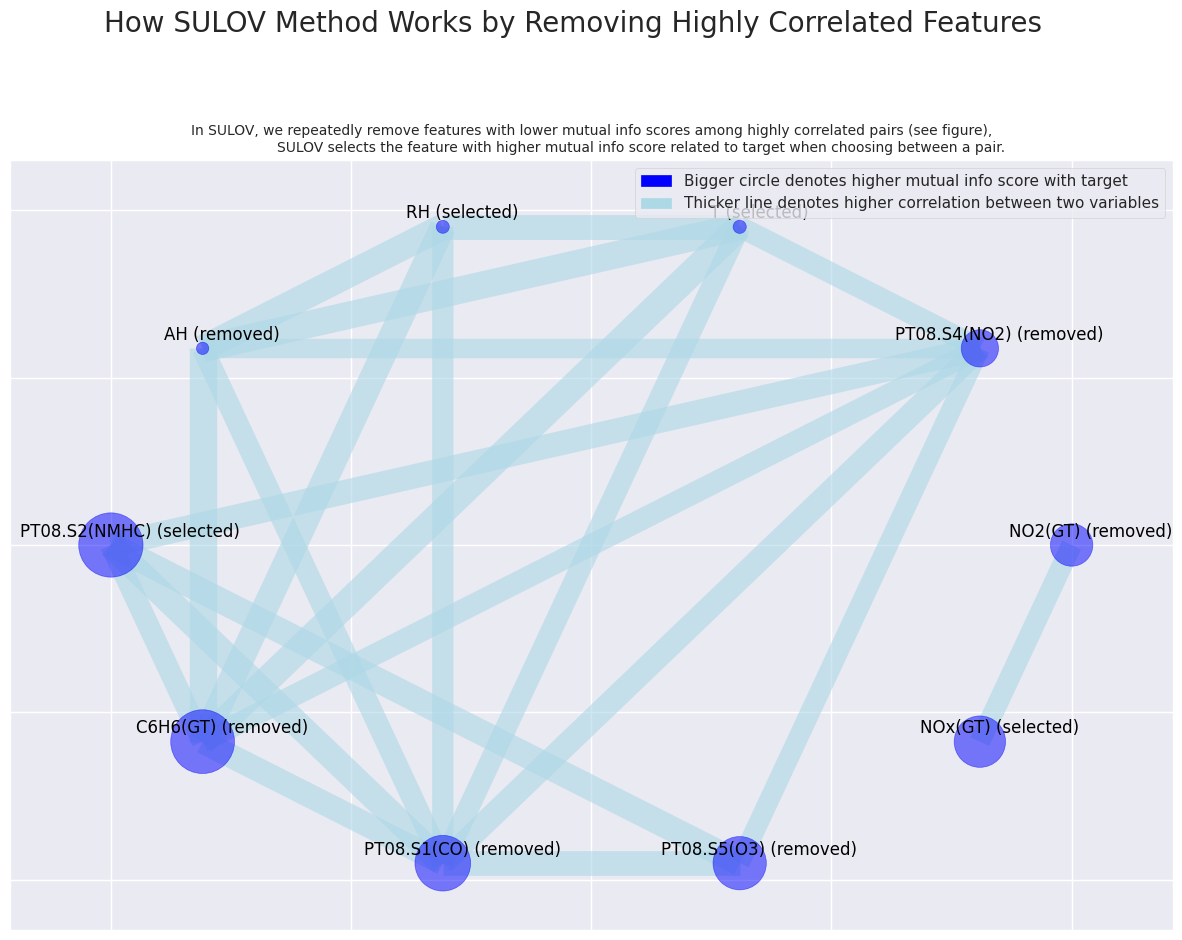

Splitting selected features into float and categorical (integer) variables:
    (6) float variables ...
    (0) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 6 
    Finding Important Features using Boosted Trees algorithm...
        using 6 variables...
        using 4 variables...
        using 2 variables...
Found 6 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  4911 , CV rows =  1228
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling of train and validation data
###################################

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.
RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.


    Actual training time (in seconds): 63
###########  Single_Label  M O D E L   R E S U L T S #################
5-fold Cross Validation rmse Score = 0.5612
    Best Parameters for Model = {'C': 21.16867855893635, 'epsilon': 0.5543457845906854}
########################################################
Linear Model Prediction Results on Held Out CV Data Set:
Regression Plots completed in 0.041 seconds
    MAE = 0.3663
    MAPE = 30% (MAPE will be very high when zeros in actuals)
    RMSE = 0.5579
    Normalized MAE (as % std dev of Actuals) = 25%
    Normalized RMSE (% of Std Dev of Actuals) = 38%
################# E N S E M B L E  M O D E L  ##################
Time taken = 3 seconds
Based on trying multiple models, Best type of algorithm for this data set is Bagging_Regressor
    Displaying results of weighted average ensemble of 5 regressors
#############################################################################
Regression Plots completed in 0.063 seconds
    MAE = 0.3450
    MAP

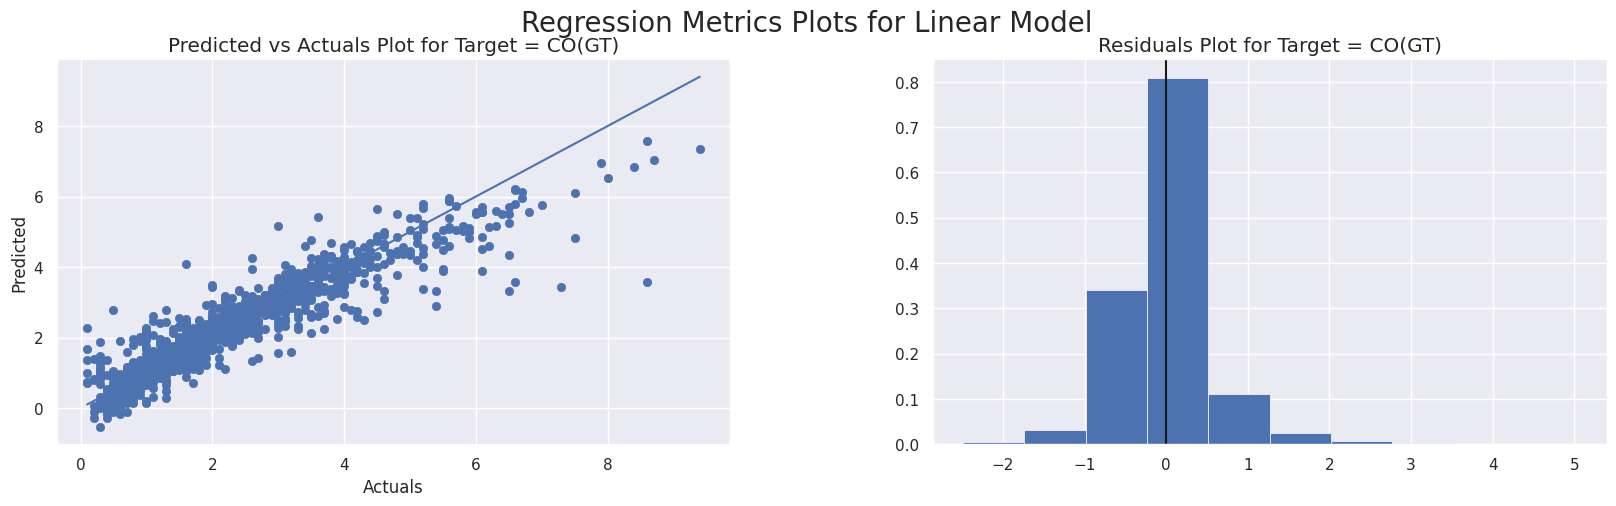

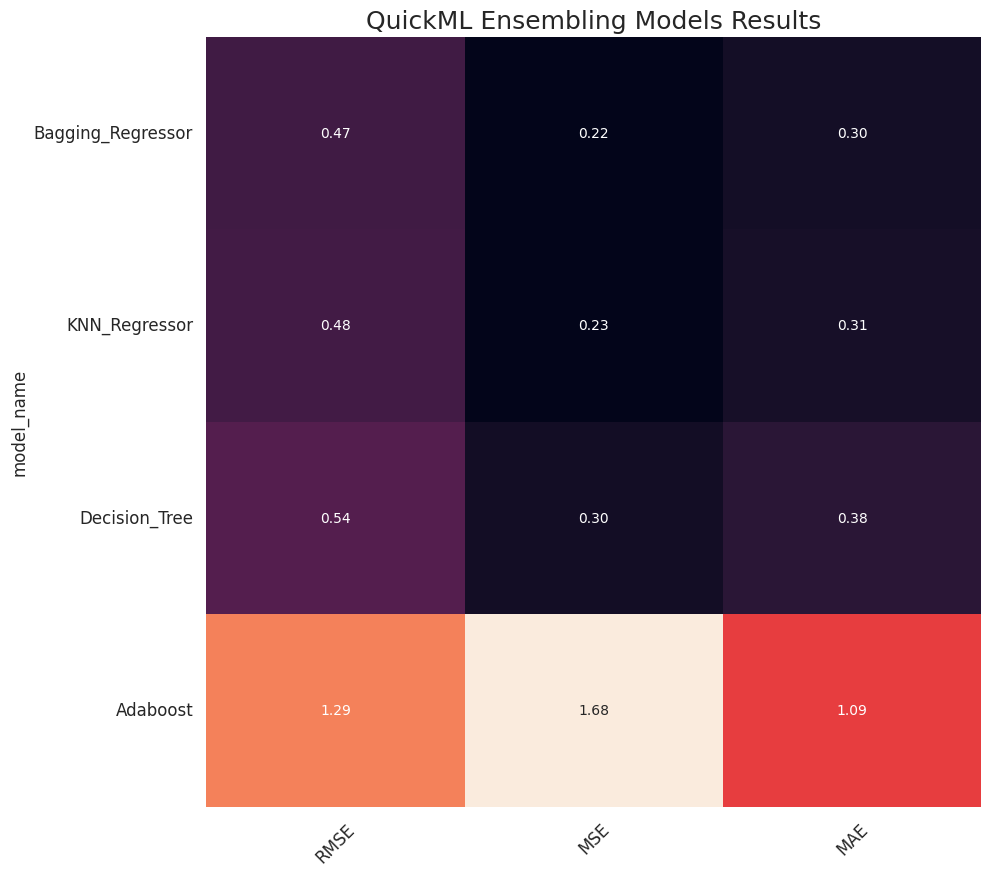

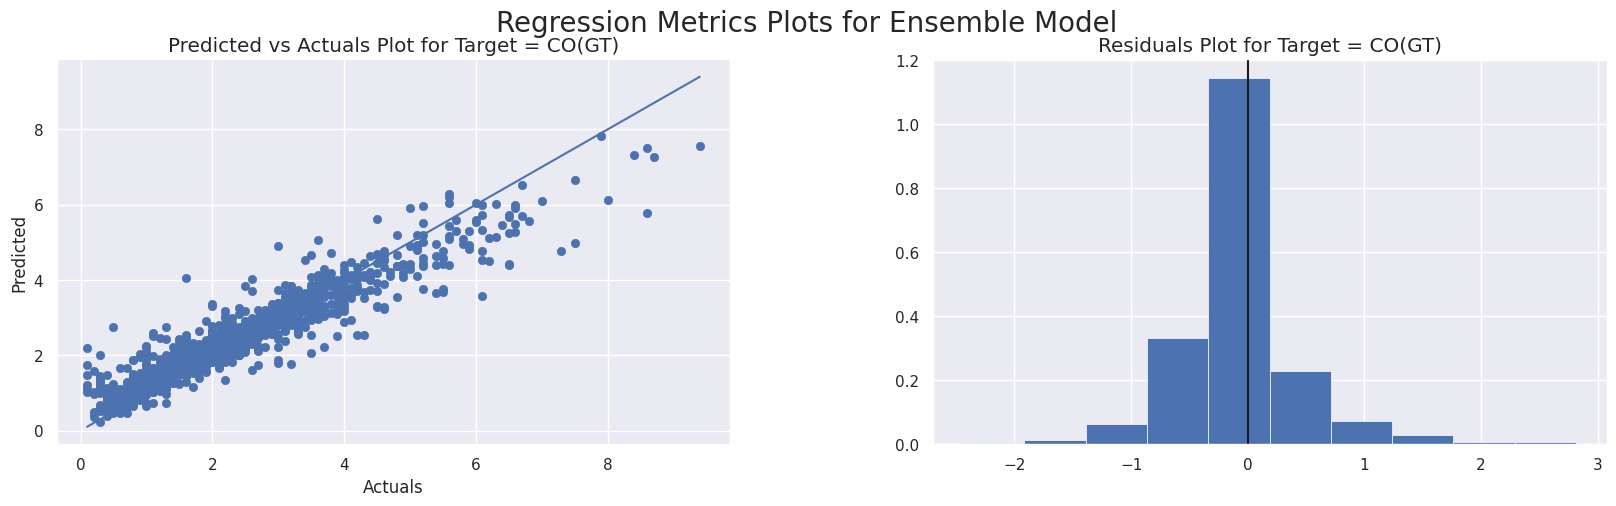

<Figure size 1500x500 with 0 Axes>

In [ ]:
from autoviml.Auto_ViML import Auto_ViML
from sklearn.model_selection import train_test_split

# Drop unnecessary columns
data = data.drop(columns=['Date', 'Time'], errors='ignore')

# Define target variable and features
target = 'CO(GT)'
X = data.drop(columns=[target], errors='ignore')
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare combined training DataFrame for AutoViML
train_data = X_train.copy()
train_data[target] = y_train

# Run AutoViML
model, features, trainm, testm = Auto_ViML(
    train=train_data,         # Training data with target included
    target=target,            # Target variable name
    test=X_test,              # Test data (features only)
    sample_submission=None,   # Not needed
    hyper_param='RS',         # Random search for hyperparameter tuning
    feature_reduction=True,   # Enable feature reduction
    scoring_parameter='rmse', # Scoring metric
    verbose=1
)